In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split

iris_data = sns.load_dataset('iris')

y = iris_data['species']
x = iris_data.loc[:, 'sepal_length':'petal_width']

#x, y = 
lr = LogisticRegression(max_iter = 100)
kn = KNeighborsClassifier(n_neighbors = 3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
lr.fit(x_train, y_train)
kn.fit(x_train, y_train)

s1 = lr.score(x_test, y_test)
s2 = kn.score(x_test, y_test)

print('Model A accuracy: %.2f%%' % (s1*100))
print('Model B accuracy: %.2f%%' % (s2*100))

Model A accuracy: 96.00%
Model B accuracy: 96.00%


In [17]:
from sklearn.preprocessing import LabelEncoder

# Map the categorical class labels to numeric classes (setosa = 1, versicolor = 2, ...)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# shuffle the dataset to avoid picking just from one class
# set the random_state = 37 to have reproducible steps
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=37)

In [19]:
cv_lr = cross_validate(lr, x, y_encoded, cv = k_fold, scoring = ('accuracy', 'f1_macro'), return_train_score=True)
cv_kn = cross_validate(kn, x, y_encoded, cv = k_fold, scoring = ('accuracy', 'f1_macro'), return_train_score=True)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [36]:
import pandas as pd

perf = pd.DataFrame({
  'Model': ['LR'] * len(cv_lr["test_f1_macro"]) + ['KN'] * len(cv_kn["test_f1_macro"]),
  'Performance': list(cv_lr['test_f1_macro']) + list(cv_kn['test_f1_macro'])
})

print(perf)

   Model  Performance
0     LR     0.932660
1     LR     1.000000
2     LR     1.000000
3     LR     1.000000
4     LR     1.000000
5     LR     1.000000
6     LR     1.000000
7     LR     1.000000
8     LR     0.932660
9     LR     0.733333
10    KN     0.932660
11    KN     1.000000
12    KN     1.000000
13    KN     1.000000
14    KN     1.000000
15    KN     1.000000
16    KN     1.000000
17    KN     1.000000
18    KN     0.866667
19    KN     0.797980


In [37]:
from scipy.stats import wilcoxon

# perform Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_pval = wilcoxon(perf[perf['Model'] == 'LR']['Performance'], 
                                        perf[perf['Model'] == 'KN']['Performance'], 
                                        alternative = 'two-sided', 
                                        zero_method = 'zsplit', 
                                        correction=False,
                                       mode = 'approx')


In [38]:
wilcoxon_pval

0.95693920783498

Wilcoxon Signed-Rank Test:
Statistic: 27.0
p-value: 0.95693920783498
Mean Performance for M1: nan
Mean Performance for M2: nan


<Axes: xlabel='Model', ylabel='Performance'>

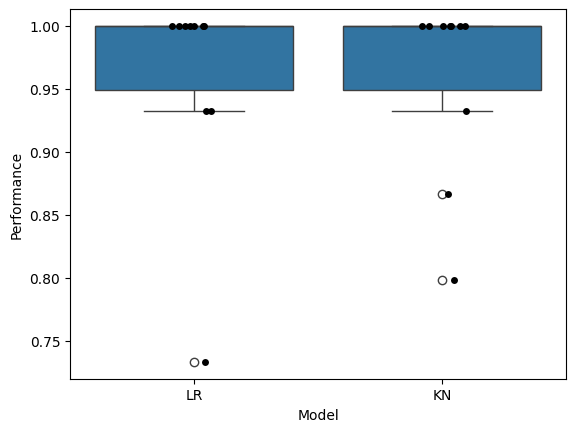

In [25]:
# display test results
print("Wilcoxon Signed-Rank Test:")
print(f"Statistic: {wilcoxon_stat}")
print(f"p-value: {wilcoxon_pval}")

# calculate means
mean_m1 = perf[perf['Model'] == 'M1']['Performance'].mean()
mean_m2 = perf[perf['Model'] == 'M2']['Performance'].mean()

print(f"Mean Performance for M1: {mean_m1}")
print(f"Mean Performance for M2: {mean_m2}")

# plot with statistical results
sns.boxplot(data=perf, x='Model', y='Performance')
sns.stripplot(data=perf, x='Model', y='Performance', color='black', size=5)
